In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

raw_data=pd.read_csv("Copper_Set.csv")
cols=raw_data.columns

for col in cols:
    print('Total Unique ['+ col + '] = ' + str(len(raw_data[col].unique())))

print('DataFrame size' , (raw_data.shape))

Total Unique [id] = 181672
Total Unique [item_date] = 253
Total Unique [quantity tons] = 181673
Total Unique [customer] = 1170
Total Unique [country] = 18
Total Unique [status] = 10
Total Unique [item type] = 7
Total Unique [application] = 31
Total Unique [thickness] = 595
Total Unique [width] = 1386
Total Unique [material_ref] = 16564
Total Unique [product_ref] = 33
Total Unique [delivery date] = 29
Total Unique [selling_price] = 9796
DataFrame size (181673, 14)


In [2]:
raw_data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [3]:
filtered_data=raw_data[
    raw_data['id'].notnull() &
    raw_data['thickness'].notnull() &
    raw_data['status'].notnull() &
    raw_data['item_date'].notnull() &
    raw_data['customer'].notnull() &
    raw_data['country'].notnull() &
    raw_data['application'].notnull() &
    raw_data['delivery date'].notnull() &
    raw_data['selling_price'].notnull()
    ]

In [4]:
filtered_data.isnull().sum()

id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref     77886
product_ref          0
delivery date        0
selling_price        0
dtype: int64

In [5]:
filtered_data['item_date'] = filtered_data['item_date'].astype(int)
filtered_data['item_date'] = pd.to_datetime(filtered_data['item_date'], format='%Y%m%d', errors='coerce').dt.date
filtered_data['quantity tons'] = pd.to_numeric(filtered_data['quantity tons'], errors='coerce')
filtered_data['delivery date'] = pd.to_datetime(filtered_data['delivery date'], format='%Y%m%d', errors='coerce').dt.date

def replace_with_null(value):
    if isinstance(value,str) and value.startswith('0000'):
        return pd.NA
    return value

filtered_data['material_ref'] = filtered_data['material_ref'].apply(replace_with_null)

In [6]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181636 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181636 non-null  object 
 1   item_date      181634 non-null  object 
 2   quantity tons  181635 non-null  float64
 3   customer       181636 non-null  float64
 4   country        181636 non-null  float64
 5   status         181636 non-null  object 
 6   item type      181636 non-null  object 
 7   application    181636 non-null  float64
 8   thickness      181636 non-null  float64
 9   width          181636 non-null  float64
 10  material_ref   81024 non-null   object 
 11  product_ref    181636 non-null  int64  
 12  delivery date  181634 non-null  object 
 13  selling_price  181636 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [7]:
filtered_data['quantity tons'].fillna(filtered_data['quantity tons'].mode().iloc[0] , inplace=True)
filtered_data = filtered_data[filtered_data['item_date'].notnull() &
                              filtered_data['delivery date'].notnull()
                              ]
filtered_data = filtered_data[filtered_data['quantity tons']>0]
filtered_data = filtered_data[filtered_data['selling_price']>0]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181620 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181620 non-null  object 
 1   item_date      181620 non-null  object 
 2   quantity tons  181620 non-null  float64
 3   customer       181620 non-null  float64
 4   country        181620 non-null  float64
 5   status         181620 non-null  object 
 6   item type      181620 non-null  object 
 7   application    181620 non-null  float64
 8   thickness      181620 non-null  float64
 9   width          181620 non-null  float64
 10  material_ref   81021 non-null   object 
 11  product_ref    181620 non-null  int64  
 12  delivery date  181620 non-null  object 
 13  selling_price  181620 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [8]:
final_data = filtered_data[['quantity tons','country','item type','application','thickness','width','material_ref','product_ref','status','selling_price','customer']]

cols=final_data.columns

for col in cols:
    print('Total Unique ['+ col + '] = ' + str(len(final_data[col].unique())))

print('DataFrame size' , (final_data.shape))

Total Unique [quantity tons] = 181620
Total Unique [country] = 17
Total Unique [item type] = 7
Total Unique [application] = 30
Total Unique [thickness] = 593
Total Unique [width] = 1386
Total Unique [material_ref] = 11496
Total Unique [product_ref] = 33
Total Unique [status] = 9
Total Unique [selling_price] = 9789
Total Unique [customer] = 1167
DataFrame size (181620, 11)


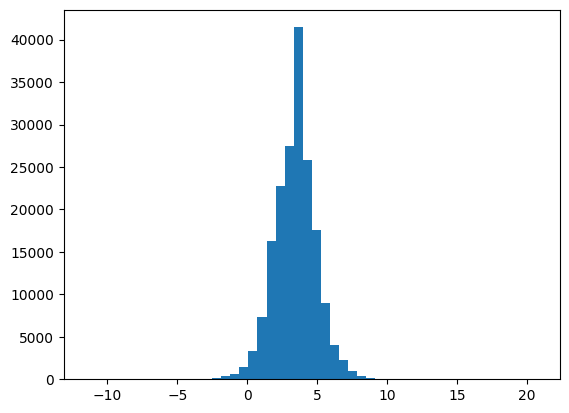

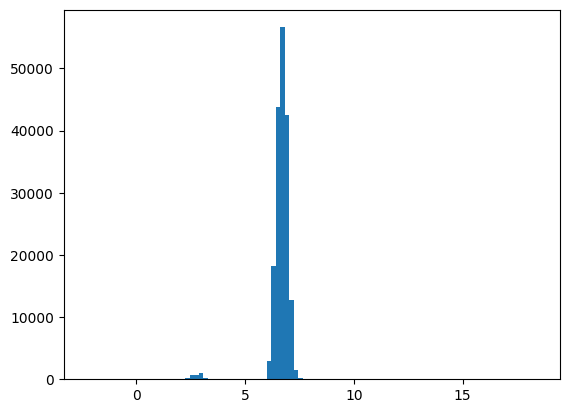

In [9]:
final_data['quantity adjusted'] = np.log(final_data['quantity tons'])
plt.hist(final_data['quantity adjusted'],bins=50)
plt.show()

final_data['selling_price_converted'] = np.log(final_data['selling_price'])
plt.hist(final_data['selling_price_converted'],bins=100)
plt.show()

final_data['customer converted'] = np.log(final_data['customer'])

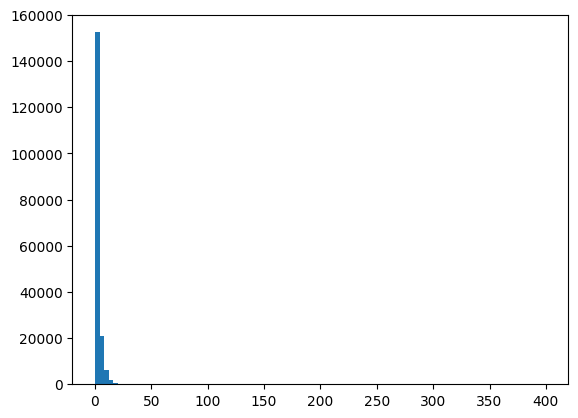

In [10]:
plt.hist(final_data['thickness'],bins=100)
plt.show()

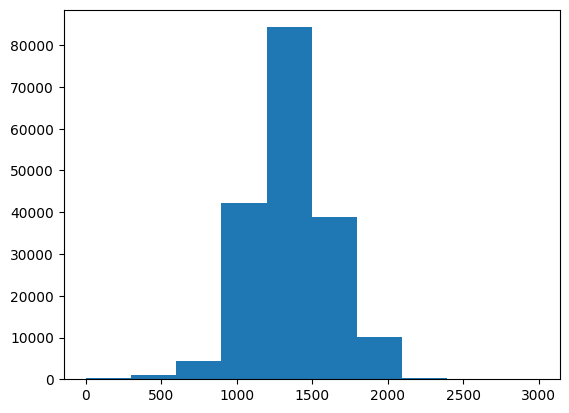

In [11]:
plt.hist(final_data['width'])
plt.show()

In [12]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181620 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   quantity tons            181620 non-null  float64
 1   country                  181620 non-null  float64
 2   item type                181620 non-null  object 
 3   application              181620 non-null  float64
 4   thickness                181620 non-null  float64
 5   width                    181620 non-null  float64
 6   material_ref             81021 non-null   object 
 7   product_ref              181620 non-null  int64  
 8   status                   181620 non-null  object 
 9   selling_price            181620 non-null  float64
 10  customer                 181620 non-null  float64
 11  quantity adjusted        181620 non-null  float64
 12  selling_price_converted  181620 non-null  float64
 13  customer converted       181620 non-null  float64
dtypes: f

In [13]:
X=final_data[['quantity adjusted','width','thickness','country','item type','application','product_ref','customer converted']]
Y1=final_data['selling_price_converted']
Y2=final_data['status']

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [15]:
Encoder_X = ColumnTransformer(
    [('onehot', OneHotEncoder(), ['item type'])],
    remainder='passthrough'
)

Encoder_Y2 = ColumnTransformer(
    [('onehot', OneHotEncoder(), ['status'])],
    remainder='passthrough'
)

In [16]:
Encoder_X.fit(X)
Encoder_Y2.fit(pd.DataFrame(Y2))
X_encoded = Encoder_X.transform(X)
Y2_encoded = pd.DataFrame(Encoder_Y2.transform(pd.DataFrame(Y2)).toarray())

X_expanded = pd.DataFrame(X_encoded)

scaler = StandardScaler()
scaler.fit(X_expanded)

X_scaled = pd.DataFrame(scaler.transform(X_expanded))